<a href="https://colab.research.google.com/github/Shankar-Hadimani/1000-dphi/blob/master/notebooks/car_insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries
You can import all the libraries required here or you can import the libraries wherever you require on the go.

In [101]:
###  sklearn libraries
from sklearn.metrics import plot_confusion_matrix, accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

###  MS lightGBM
from lightgbm import LGBMClassifier

###  pythonic libraries
from datetime import datetime
from time import strptime
import pandas as pd
import numpy as np

##  google libraries
from google.colab import drive

###  visulaization libraries
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the Dataset
Load the required train or test datasets here.

In [102]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [103]:
!ls -ltr gdrive/MyDrive/ai-ml-datasets/

total 5501
-rw------- 1 root root 5275912 Nov 23 19:37 5-celebrity-faces-dataset.zip
-rw------- 1 root root  275129 Apr 19 22:00 Train_data.csv
-rw------- 1 root root   81346 Apr 19 22:00 Test_data.csv


In [104]:
train_data = pd.read_csv('gdrive/MyDrive/ai-ml-datasets/Train_data.csv')
test_data = pd.read_csv('gdrive/MyDrive/ai-ml-datasets/Test_data.csv')

# Exploratory Data Analysis (EDA)
Perform all the exploratory data analysis steps here.

In [105]:
train_data.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1


In [106]:
test_data.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end
0,65.000000,retired,married,secondary,0,20806.0,0,0,telephone,8,apr,2,-1,0,NaN,12:22:13,12:30:56
1,36.000000,management,married,tertiary,0,900.0,1,0,NaN,15,may,2,-1,0,NaN,17:59:45,18:07:40
2,37.000000,management,married,tertiary,0,6771.0,0,0,cellular,7,sep,1,186,1,success,14:05:19,14:10:56
3,30.065066,management,single,tertiary,0,0.0,0,0,cellular,14,may,2,-1,0,NaN,17:33:27,09:47:54
4,41.000000,management,married,tertiary,0,328.0,1,0,cellular,29,jul,12,-1,0,NaN,14:40:26,14:41:31


In [107]:
print('shape of the training dataset is {}'.format(train_data.shape))
print('shape of the test dataset is {}'.format(test_data.shape))

shape of the training dataset is (3102, 18)
shape of the test dataset is (935, 17)


In [108]:
train_data.describe()

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,no_of_contacts,days_passed,prev_attempts,car_insurance
count,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000
mean,41.325847,0.014507,1543.067240,0.465184,0.114442,15.353965,2.356867,52.419084,0.792392,0.567376
std,11.517698,0.119587,3301.474598,0.498867,0.318399,8.164255,2.594238,109.231364,2.224740,0.495520
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,123.821352,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,589.000000,0.000000,0.000000,15.000000,2.000000,-1.000000,0.000000,1.000000
75%,49.000000,0.000000,1696.000000,1.000000,0.000000,21.000000,3.000000,56.750000,1.000000,1.000000
max,92.000000,1.000000,52587.000000,1.000000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [109]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3091 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      2989 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   communication        2559 non-null   object 
 9   last_contact_day     3102 non-null   int64  
 10  last_contact_month   3102 non-null   object 
 11  no_of_contacts       3102 non-null   int64  
 12  days_passed          3102 non-null   int64  
 13  prev_attempts        3102 non-null   int64  
 14  Outcome              751 non-null    object 
 15  call_start           3102 non-null   o

In [110]:
train_data.isnull().sum()

age                       0
job_type                 11
marital_status            0
education_level         113
default_or_not            0
balance_amt               0
household_insurance       0
car_loan                  0
communication           543
last_contact_day          0
last_contact_month        0
no_of_contacts            0
days_passed               0
prev_attempts             0
Outcome                2351
call_start                0
call_end                  0
car_insurance             0
dtype: int64

In [111]:
train_data['last_contact_month'].value_counts()

may    770
aug    449
jul    412
jun    330
apr    286
nov    254
feb    218
oct     99
sep     98
jan     94
mar     66
dec     26
Name: last_contact_month, dtype: int64

In [112]:
train_data['job_type'].value_counts()

management       724
blue-collar      544
technician       526
admin.           346
services         231
retired          193
unemployed       146
student          119
self-employed    106
housemaid         80
entrepreneur      76
Name: job_type, dtype: int64

In [113]:
train_data['education_level'].value_counts()

secondary    1569
tertiary     1030
primary       390
Name: education_level, dtype: int64

In [114]:
train_data['communication'].value_counts()

cellular     2397
telephone     162
Name: communication, dtype: int64

In [115]:
train_data['Outcome'].value_counts()

failure    309
success    299
other      143
Name: Outcome, dtype: int64

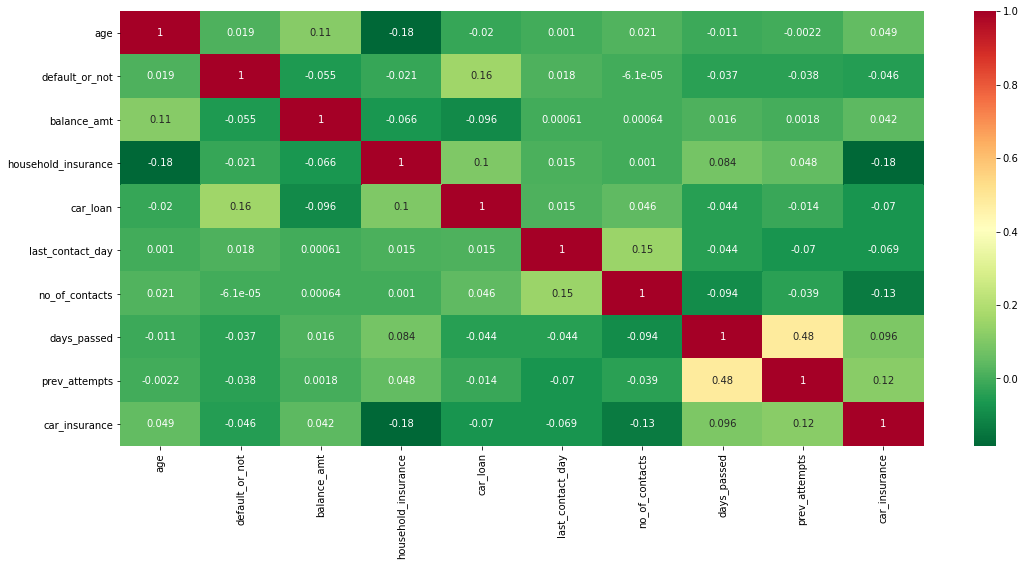

In [116]:
plt.figure(figsize=(18,8))
sns.heatmap(train_data.corr(), annot=True,cmap=plt.cm.RdYlGn_r)   
plt.show()

# Data Cleaning and Data Preprocessing
Perform all the data cleaning and data preprocessing steps here.

In [117]:
### calculate call duration from start and end dates
start_time = pd.to_datetime(train_data['call_start'].astype(str))
end_time = pd.to_datetime(train_data['call_end'].astype(str))
train_data['call_duration_mins']= end_time.sub(start_time).dt.total_seconds().div(60)

In [118]:
# convert month names to month number 
train_data['last_contact_month']=train_data['last_contact_month'].str.capitalize()
train_data['last_contact_month_num']=train_data['last_contact_month'].apply(lambda x:strptime( x,'%b').tm_mon)

In [119]:
# drop columns
train_data.drop(columns=['call_start','call_end','last_contact_month'], inplace=True)

In [120]:
# segregate label and depedent variables 
X = train_data.drop(['car_insurance'],axis=1)
y = train_data['car_insurance']

In [121]:
### check for class imbalance
train_data['car_insurance'].value_counts()

1    1760
0    1342
Name: car_insurance, dtype: int64

In [122]:
print('shape of the features', X.shape)
print('shape of the labels', y.shape)

shape of the features (3102, 16)
shape of the labels (3102,)


In [123]:
#classify categorical and numeric features
numeric_features = X.select_dtypes(exclude=[object]).columns
categorical_features = X.select_dtypes(include=[object]).columns

In [124]:
### list of the numerical features
numeric_features

Index(['age', 'default_or_not', 'balance_amt', 'household_insurance',
       'car_loan', 'last_contact_day', 'no_of_contacts', 'days_passed',
       'prev_attempts', 'call_duration_mins', 'last_contact_month_num'],
      dtype='object')

In [125]:
### list of the categorical features
categorical_features

Index(['job_type', 'marital_status', 'education_level', 'communication',
       'Outcome'],
      dtype='object')

In [126]:
### setup pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

In [127]:
### setup pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value='most_frequent')),
    ('oneHot', OneHotEncoder(handle_unknown='ignore'))])

In [128]:
### setup column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Build Machine Learning Model & Evaluate it
Build your all the machine learning model and check their performance on the validation dataset (i.e. the test dataset that you splitted using ***train_test_split***) here.

# **BaseLine Model**

# **Logistic Regression**

In [129]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.675


[[251 192]
 [141 440]]
              precision    recall  f1-score   support

           0       0.64      0.57      0.60       443
           1       0.70      0.76      0.73       581

    accuracy                           0.67      1024
   macro avg       0.67      0.66      0.66      1024
weighted avg       0.67      0.67      0.67      1024

training score.... 0.6713185755534168
test score.... 0.6748046875
AUC ROC, area under the curve... 0.6619531981521701


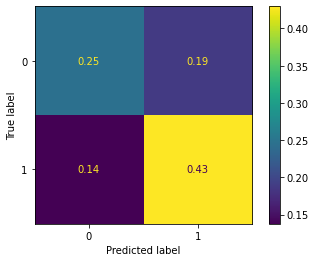

In [130]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred, ))
print(classification_report(y_test, y_pred,))
print('training score....', accuracy_score(y_train, clf.predict(X_train)))
print('test score....', accuracy_score(y_test, clf.predict(X_test)))
print('AUC ROC, area under the curve...', roc_auc_score(y_test,clf.predict(X_test) ))


plot_confusion_matrix(clf, X_test, y_test,normalize='all') 
plt.show()

# **RandomForest Classifier**

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       443
           1       0.89      0.90      0.89       581

    accuracy                           0.88      1024
   macro avg       0.88      0.88      0.88      1024
weighted avg       0.88      0.88      0.88      1024

training score.... 1.0
test score.... 0.8779296875
AUC ROC, area under the curve... 0.8750014569726827


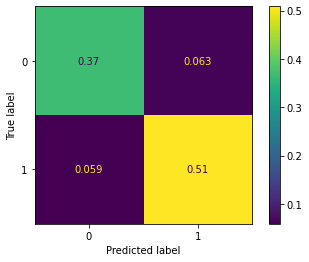

In [131]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
rfc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=150, max_depth=32, random_state=42))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print(classification_report(y_test, y_pred_rfc,))
print('training score....', accuracy_score(y_train, rfc.predict(X_train)))
print('test score....', accuracy_score(y_test, rfc.predict(X_test)))
print('AUC ROC, area under the curve...', roc_auc_score(y_test,rfc.predict(X_test) ))


plot_confusion_matrix(rfc, X_test, y_test,normalize='all') 
plt.show()

# **LightGBM Classifier**

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       443
           1       0.90      0.89      0.89       581

    accuracy                           0.88      1024
   macro avg       0.88      0.88      0.88      1024
weighted avg       0.88      0.88      0.88      1024

training score.... 1.0
test score.... 0.87890625
AUC ROC, area under the curve... 0.8777386229859779


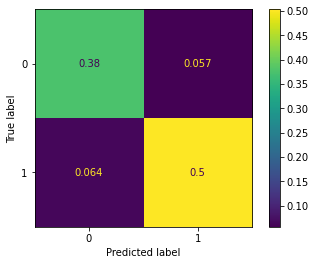

In [132]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier(learning_rate= 0.3, max_depth=32,n_estimators=150, num_leaves=70, random_state=42))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lgbm.fit(X_train, y_train)
y_pred_lgb = lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgb,))
print('training score....', accuracy_score(y_train, lgbm.predict(X_train)))
print('test score....', accuracy_score(y_test, lgbm.predict(X_test)))

print('AUC ROC, area under the curve...', roc_auc_score(y_test,lgbm.predict(X_test) ))

plot_confusion_matrix(lgbm, X_test, y_test,normalize='all') 
plt.show()


# Prediction for Test Dataset (Provided by DPhi)
Predict if the customer would buy the car insurance or not on the test data provided by DPhi here.


In [133]:
# read test data .., provided
test_data = pd.read_csv('gdrive/MyDrive/ai-ml-datasets/Test_data.csv')

In [134]:
test_data.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end
0,65.000000,retired,married,secondary,0,20806.0,0,0,telephone,8,apr,2,-1,0,NaN,12:22:13,12:30:56
1,36.000000,management,married,tertiary,0,900.0,1,0,NaN,15,may,2,-1,0,NaN,17:59:45,18:07:40
2,37.000000,management,married,tertiary,0,6771.0,0,0,cellular,7,sep,1,186,1,success,14:05:19,14:10:56
3,30.065066,management,single,tertiary,0,0.0,0,0,cellular,14,may,2,-1,0,NaN,17:33:27,09:47:54
4,41.000000,management,married,tertiary,0,328.0,1,0,cellular,29,jul,12,-1,0,NaN,14:40:26,14:41:31


In [135]:
### calculate call duration from start and end dates
start_time = pd.to_datetime(test_data['call_start'].astype(str))
end_time = pd.to_datetime(test_data['call_end'].astype(str))
test_data['call_duration_mins']= end_time.sub(start_time).dt.total_seconds().div(60)


# convert month names to month number 
test_data['last_contact_month']=test_data['last_contact_month'].str.capitalize()
test_data['last_contact_month_num']=test_data['last_contact_month'].apply(lambda x:strptime( x,'%b').tm_mon)



# drop columns
test_data.drop(columns=['call_start','call_end','last_contact_month'], inplace=True)

#classify categorical and numeric features
numeric_features = test_data.select_dtypes(exclude=[object]).columns
categorical_features = test_data.select_dtypes(include=[object]).columns

In [136]:
predictions = lgbm.predict(test_data)

# Saving Prediction File

In [137]:
# create Dataframe of predicted value with index
res = pd.DataFrame(predictions) 
res.index = test_data.index 
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('car_insurance_prediction_results.csv')         
files.download('car_insurance_prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>